<a href="https://colab.research.google.com/github/bsjin1122/deep-learning/blob/main/03_keras/part03_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 경사하강법

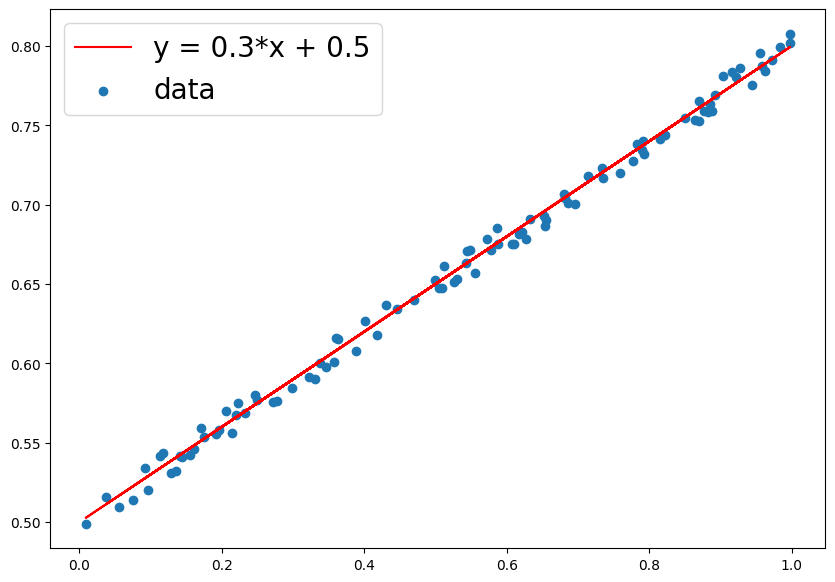

w: 0.3, b: 0.5


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 샘플에 활용할 데이터 셋 만들기
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise
    plt.figure(figsize=(10, 7))
    plt.plot(x, y, color='r', label=f'y = {w}*x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

In [2]:
# 최대 반복 횟수
num_epoch = 1000

# 학습율 (learning_rate)
learning_rate = 0.005

# 에러 기록
errors = []

# random 한 값으로 w, b를 초기화 합니다.
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    # Hypothesis 정의
    y_hat = w * x + b

    # Loss Function 정의
    error = 0.5*((y_hat - y) ** 2).sum()
    if error < 0.005:
        break
    # Gradient 미분 계산
    w = w - learning_rate * ((y_hat - y) * x).sum()
    b = b - learning_rate * (y_hat - y).sum()

    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))

print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))

 0 w = 0.18551, b = 0.62300 error = 1.48857
 5 w = 0.18137, b = 0.56712 error = 0.06600
10 w = 0.19906, b = 0.55672 error = 0.04825
15 w = 0.21423, b = 0.54806 error = 0.03541
20 w = 0.22714, b = 0.54069 error = 0.02612
25 w = 0.23813, b = 0.53442 error = 0.01938
30 w = 0.24748, b = 0.52908 error = 0.01450
35 w = 0.25543, b = 0.52453 error = 0.01097
40 w = 0.26221, b = 0.52067 error = 0.00841
45 w = 0.26797, b = 0.51738 error = 0.00656
50 w = 0.27288, b = 0.51457 error = 0.00521
------------------------------------------------------------
51 w = 0.3, b = 0.5 error = 0.00499


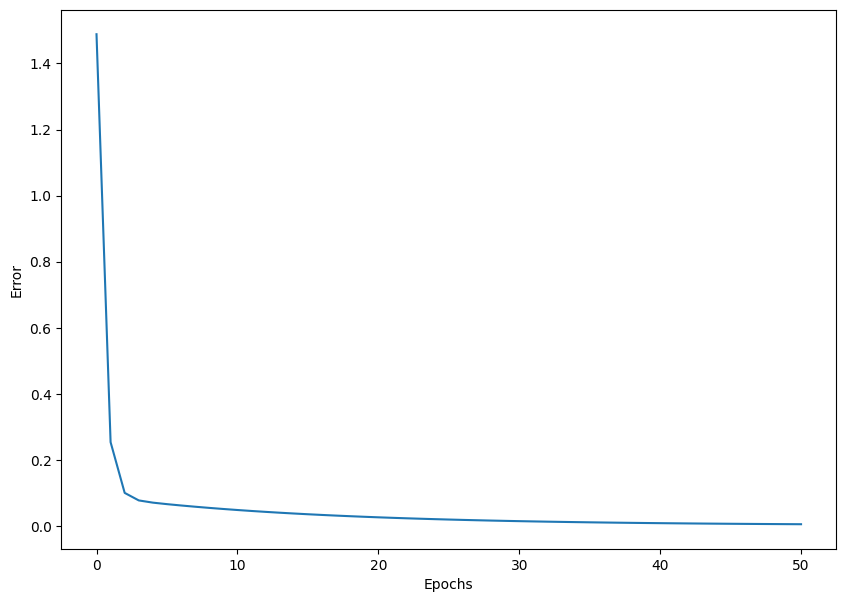

In [3]:
# 시각화
plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

In [1]:
import tensorflow as tf

# 10개의 노드로 이루어진 Dense 레이어
tf.keras.layers.Dense(10)

# ReLu 활성화 함수 적용
tf.keras.layers.Dense(10, activation='relu')

In [2]:
import numpy as np

# 샘플 데이터셋 생성
x = np.arange(1, 6)

# y = 3x + 2
y = 3 * x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


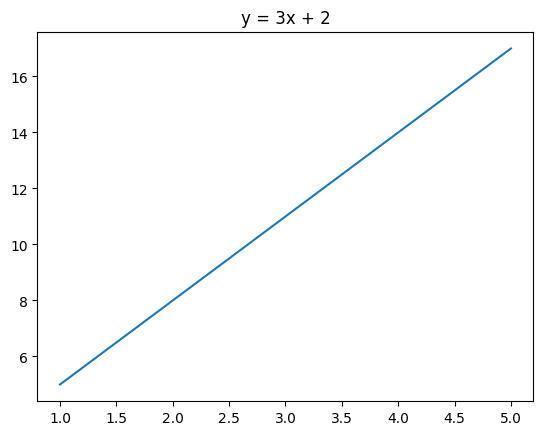

In [3]:
import matplotlib.pyplot as plt

# 시각화
plt.plot(x, y)
plt.title('y = 3x + 2')
plt.show()


In [4]:
# 리스트형
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1),
])

In [5]:
# add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))
# Sequential API를 활용하여 모델을 만들 때, 쌓고자 하는 레이어의 개수는 제한이 없다.

In [6]:
model = tf.keras.Sequential([
    # 입력 데이터의 shape = (150, 4) 인 경우 input_shape 지정
    # 150개 샘플에 대하여 4개의 입력변수가 존재한다는 뜻.
    # 각 행은 샘플 데이터를, 열은 입력 변수를 나타낸다.
    tf.keras.layers.Dense(10, input_shape=[4]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1),
])

In [7]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

1개의 뉴런은 기울기에 해당하는 w와 상수항에 해당하는 b를 매개변수로 갖는다.<p></p>
y = wx + b에서 입력 데이터는 x값을 나타내는 입력 변수 1개만 존재하기 때문에 input_shape=[1]로 지정한다. <br>
1개의 뉴런을 가지는 Dense레이어는 1개의 출력값을 가지므로 출력값은 y에 대한 모델의 예측 값이다.

<br>
Dense레이어는 use_bias =True가 기본 설정되어있어 상수항 b가 추가된다.